# Plot Dominguez 2023 incidence

In [1]:
import sys
import os

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
PARENT_DIR = "/Users/sophiewagner/repos/lynch-syndrome"
DATA_DIR = os.path.join(PARENT_DIR, "data")
FILE_PATH = os.path.join(DATA_DIR, "crc_incidence.xlsx")
dominguez = pd.read_excel(FILE_PATH, sheet_name="dominguez_2023")


In [ ]:
columns = dominguez.iloc[12,1:-2]
data = dominguez.iloc[13:60,1:-2].reset_index(drop=True)
data.columns = columns
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['lower'] = pd.to_numeric(data['lower'], errors='coerce')
data['upper'] = pd.to_numeric(data['upper'], errors='coerce')
data

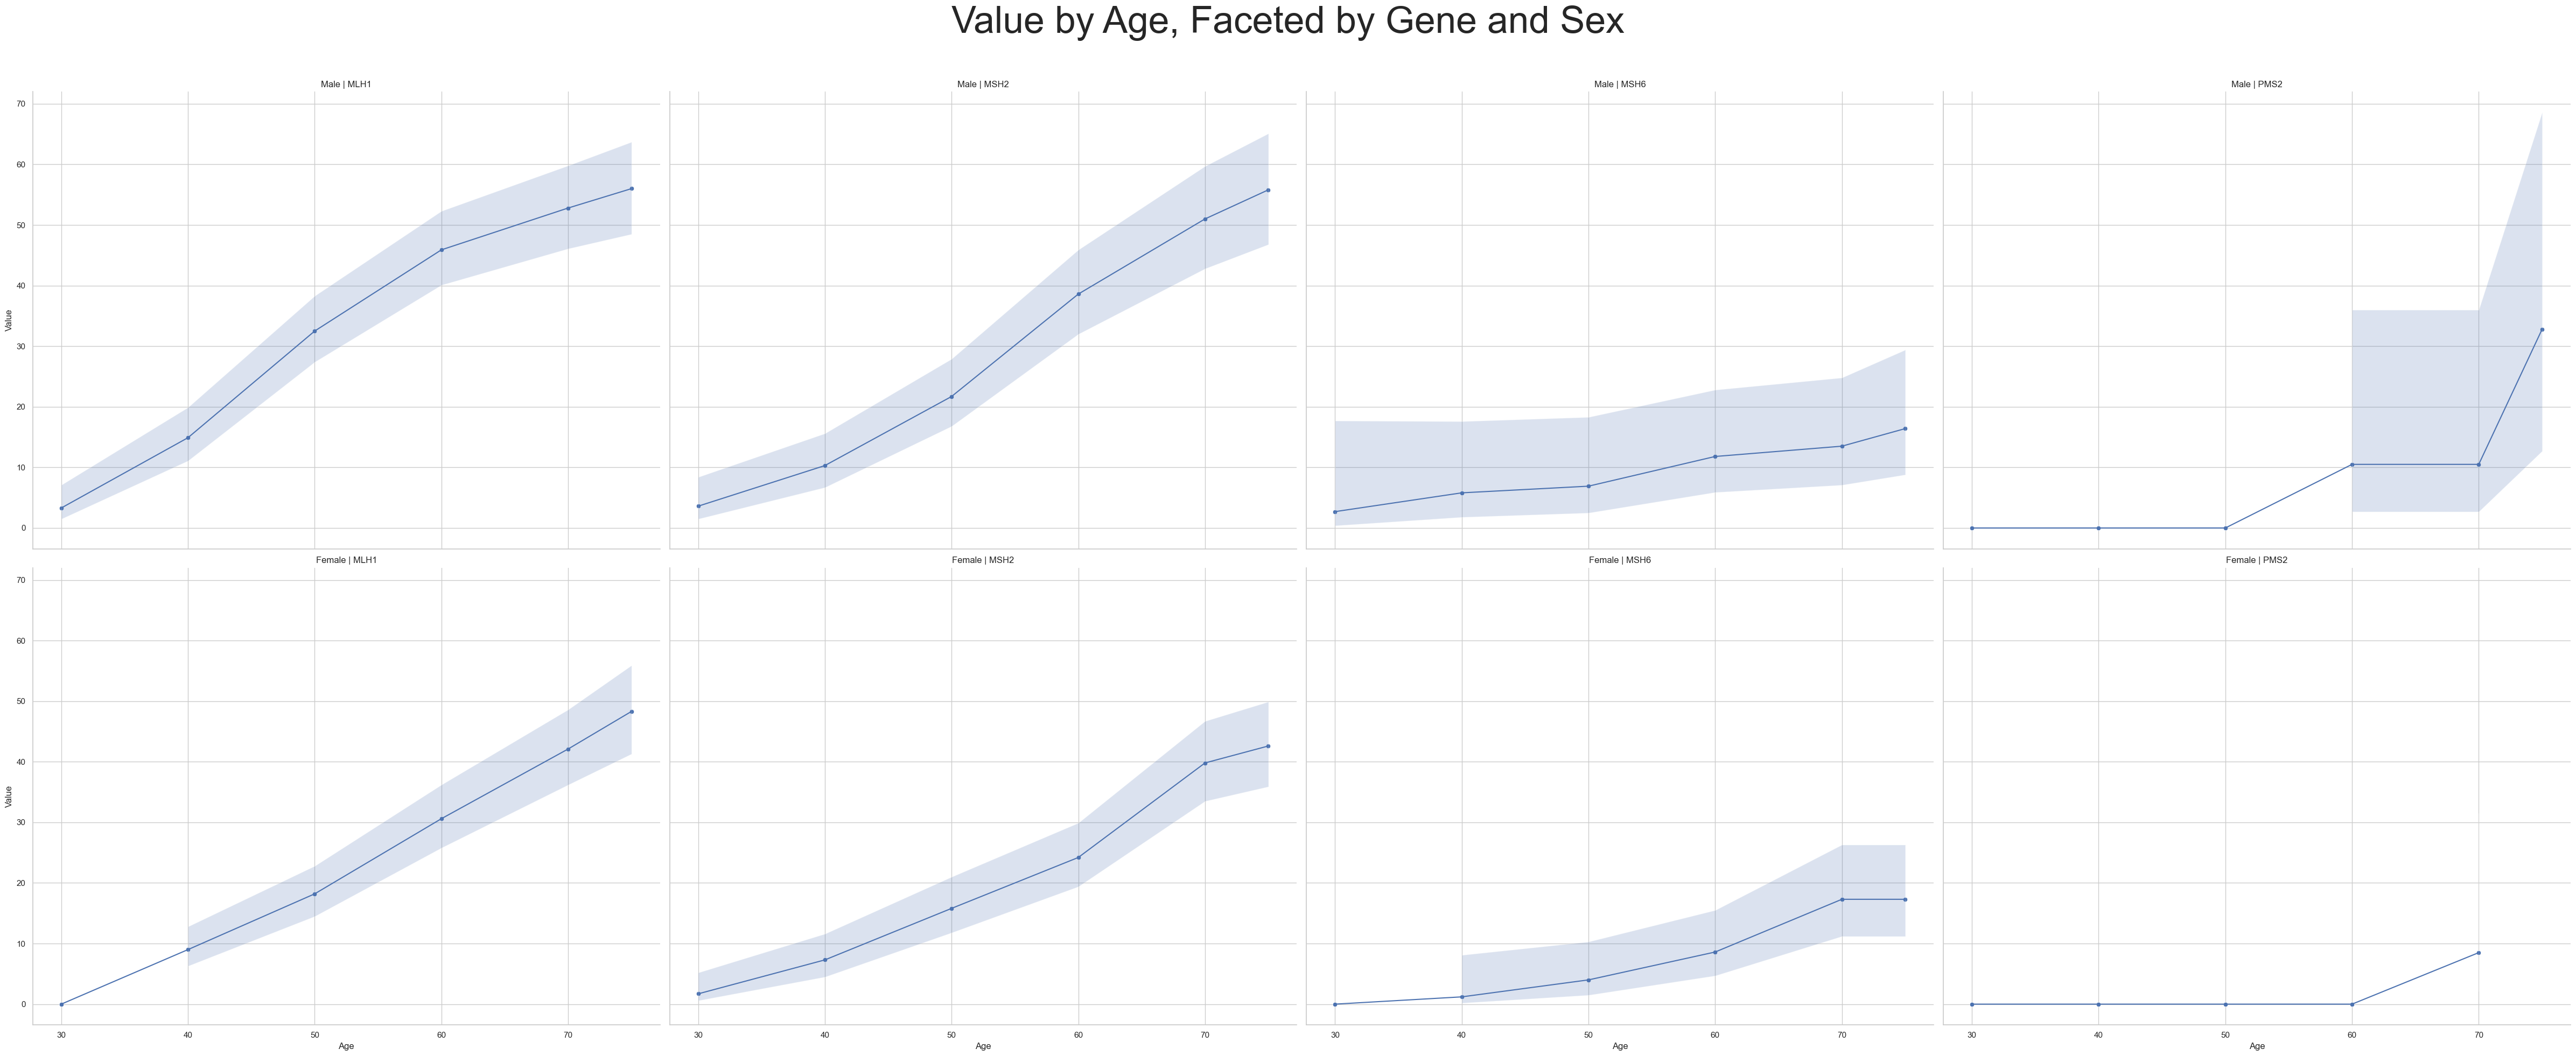

In [57]:
import seaborn as sns

# Create FacetGrid by gene
g = sns.FacetGrid(data, row='sex', col='gene', height=10, aspect=1.2, sharey=True)

# Plot line and confidence band
g.map_dataframe(sns.lineplot, x='age', y='value')
g.map_dataframe(sns.scatterplot, x='age', y='value')

# Add confidence intervals
def add_ci(data, **kwargs):
    plt.fill_between(data['age'], data['lower'], data['upper'], alpha=0.2)

g.map_dataframe(add_ci)

# Formatting
g.set_axis_labels("Age", "Value")
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Value by Age, Faceted by Gene and Sex", fontsize=50)
plt.show()